
#  1. DeepCFD 模型简介

计算流体力学（Computational fluid dynamics, CFD）通过求解Navier-Stokes方程（N-S方程），可以获得流体的各种物理量的分布，如密度、压力和速度等，在微电子系统、土木工程和航空航天等领域应用广泛。然而，在某些复杂的应用场景中，如机翼优化和流体与结构相互作用方面，需要使用千万级甚至上亿的网格对问题进行建模（如下图所示，下图展示了F-18战斗机的全机内外流一体结构化网格模型），导致CFD的计算量非常巨大。因此，目前亟需发展出一种相比于传统CFD方法更高效，且可以保持计算精度的方法。这篇文章的作者提到，可以使用深度学习的方法，通过训练少量传统CFD仿真的数据，构建一种数据驱动（data-driven）的CFD计算模型，来解决上述的问题。

<img src="http://www.cannews.com.cn/files/Resource/attachement/2017/0511/1494489582596.jpg" alt="img" style="zoom:80%;" />

本模型是针对论文：[DeepCFD: Efficient steady-state laminar flow approximation with deep convolutional neural networks](https://arxiv.org/abs/2004.08826)[J]基于飞桨框架进行模型复现，文中作者提出了一个基于卷积神经网络（Convolutional neural networks, CNN）的CFD计算模型，称作DeepCFD，该模型可以同时计算流体流过任意障碍物的流场。该方法有以下几个特点：

1. DeepCFD本质上是一种基于CNN的代理模型，可以用于快速计算二维非均匀稳态层流流动，相比于传统的CFD方法，该方法可以在保证计算精度的情况下达到至少三个数量级的加速。

2. DeepCFD可以同时计算流体在x方向和y方向的流体速度，同时还能计算流体压强。

3. 训练该模型的数据由OpenFOAM（一种开源CFD计算软件）计算得到。


# 2. 模型效果及应用场景


# 3. 模型如何使用

## 3.1 环境安装

* 硬件：GPU、CPU
* 框架：PaddlePaddle >= 2.0.0
## 3.2 数据集

数据集使用原作者利用OpenFOAM计算的CFD算例，共981组，分为两个文件（dataX.pkl, dataY.pkl），两个文件大小都是152 MB，形状均为[981, 3, 172, 79]。dataX.pkl包括三种输入：障碍物的SDF、计算域边界的SDF和流动区域的标签；dataY.pkl包括三种输出：流体的x方向速度、y方向速度和流体压强。数据获取使用的计算网格为172×79。

数据集地址：https://aistudio.baidu.com/aistudio/datasetdetail/162674

或https://www.dropbox.com/s/kg0uxjnbhv390jv/Data_DeepCFD.7z?dl=0

本示例数据集已经保存在百度云环境中，可直接使用，在项目clone之后，数据集存储在项目路径下。示意代码为
```
dataset = 'https://deepcfd-data.bj.bcebos.com/dataset.zip'
!wget dataset
```



## 3.3 快速开始

**step1：克隆本项目**
以下方式可以二选一：
* 搜索DeepCFD_with_PaddlePaddle，选择对应的版本，Fork.

![fork.png](https://github.com/zbyandmoon/Picture/blob/main/picture_DeepCFD/fork.png?raw=true)

  选择目标路径，代码如下：
```
% cd ./DeepCFD_with_PaddlePaddle/
```

* git clone 项目
  
 notebook上命令如下：
```
!git clone https://github.com/zbyandmoon/DeepCFD_with_PaddlePaddle/
%cd ./DeepCFD_with_PaddlePaddle/
```


In [ ]:
# 默认使用git clone方式，如基于已有的aistudio项目fork，可注释之后的git clone部分
# %cd ~
# %cd ./DeepCFD_with_PaddlePaddle/

In [ ]:
# 若选择git clone的方式，则忽略fork部分的操作和脚本，使用如下脚本（默认使用git方式,若repo链接较慢，可多试几次）
%cd ~
!git clone https://github.com/zbyandmoon/DeepCFD_with_PaddlePaddle/
%cd ./DeepCFD_with_PaddlePaddle/

**step2：数据集加载**
执行以下脚本，将服务器数据下载到工作路径下

In [ ]:
%cd ./data
!wget https://deepcfd-data.bj.bcebos.com/dataset.zip
!unzip dataset.zip

**step3：开始训练**

确认在正确路径后，执行如下命令

**单卡训练**

```python
python -m paddle.distributed.launch --gpus=0 train.py
```

**多卡训练**

以四卡为例

```python
python -m paddle.distributed.launch --gpus=0,1,2,3 train.py
```

结果保存在result文件中（注：result文件夹中已经包含了一个完整的训练过程，可在训练前将其清空）。多卡训练会额外生成一个./log/文件夹，存放训练日志

```python
.
├── log
│   ├── workerlog.0
│   ├── workerlog.1
│   ├── workerlog.2
│   └── workerlog.3
└── train.py
```

部分训练日志如下所示

```python
Epoch #1
        Train Loss = 884808909.0
        Train Total MSE = 10197.3000353043
        Train Ux MSE = 3405.3426083044824
        Train Uy MSE = 4334.0962839376825
        Train p MSE = 2457.8616943359375
        Validation Loss = 53205074.5
        Validation Total MSE = 1027.7523040254237
        Validation Ux MSE = 419.7688029661017
        Validation Uy MSE = 543.9674920550848
        Validation p MSE = 64.01604872881356
Epoch #2
        Train Loss = 75408434.25
        Train Total MSE = 603.198411591199
        Train Ux MSE = 277.9321616481414
        Train Uy MSE = 303.4222437021684
        Train p MSE = 21.843986488987337
        Validation Loss = 17892356.5
        Validation Total MSE = 312.7194186970339
        Validation Ux MSE = 169.64230501853814
        Validation Uy MSE = 140.46789757680085
        Validation p MSE = 2.6092084981627384
```


In [ ]:
#单卡
%cd ..
!python train.py

In [ ]:
#四卡
# !python -m paddle.distributed.launch --gpus=0,1,2,3 train.py

**step4：评估模型**

```python
python eval.py
```

此时的输出为：

```python
Total MSE is 1.895322561264038, Ux MSE is 0.6951090097427368, Uy MSE is 0.21001490950584412, p MSE is 0.9901986718177795
```

In [ ]:
!python eval.py

**step5：使用预训练模型预测**

考虑到需要展示流场图像对比结果，在Jupyter notebook环境中运行如下代码进行结果输出。

某个障碍物的流场预测结果展示如下：

![paddle_contour.png](https://github.com/zbyandmoon/Picture/blob/main/picture_DeepCFD/paddle_contour.png?raw=true)

In [25]:
# 本文件用于使用训练好的模型预测流场
import pickle
from utils.train_functions import *
from utils.functions import *
from model.UNetEx import UNetEx
import configparser

config = configparser.ConfigParser()
config.read("./config/config.ini")

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


['./config/config.ini']

In [26]:
# 设置卷积核大小
kernel_size = int(config["net_parameter"]["kernel_size"])
# 设置卷积层channel数目
filters = [int(i) for i in config["net_parameter"]["filters"].split(",")]
# 设置batch_norm和weight_norm
bn = bool(int(config["net_parameter"]["batch_norm"]))
wn = bool(int(config["net_parameter"]["weight_norm"]))
# 构建模型
model = UNetEx(3, 3, filters=filters, kernel_size=kernel_size, batch_norm=bn, weight_norm=wn)
# 加载模型参数
model.set_state_dict(
        paddle.load(os.path.join(config["path"]["save_path"], config["path"]["model_name"])))

# 加载数据集并处理
x = pickle.load(open(os.path.join(config["path"]["data_path"], "dataX.pkl"), "rb"))
y = pickle.load(open(os.path.join(config["path"]["data_path"], "dataY.pkl"), "rb"))
x = paddle.to_tensor(x, dtype="float32")
y = paddle.to_tensor(y, dtype="float32")
y_trans = paddle.transpose(y, perm=[0, 2, 3, 1])
channels_weights = paddle.reshape(
    paddle.sqrt(paddle.mean(paddle.transpose(y, perm=[0, 2, 3, 1]).reshape((981 * 172 * 79, 3)) ** 2, axis=0)),
    shape=[1, -1, 1, 1])

# 按7：3的比例分割数据集，7为训练集，3为测试集
train_data, test_data = split_tensors(x, y, ratio=float(config["hyperparameter"]["train_test_ratio"]))

train_dataset, test_dataset = paddle.io.TensorDataset([train_data[0], train_data[1]]), paddle.io.TensorDataset(
    [test_data[0], test_data[1]])
test_x, test_y = test_dataset[:]

W1121 16:09:58.850512   192 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W1121 16:09:58.854226   192 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() in

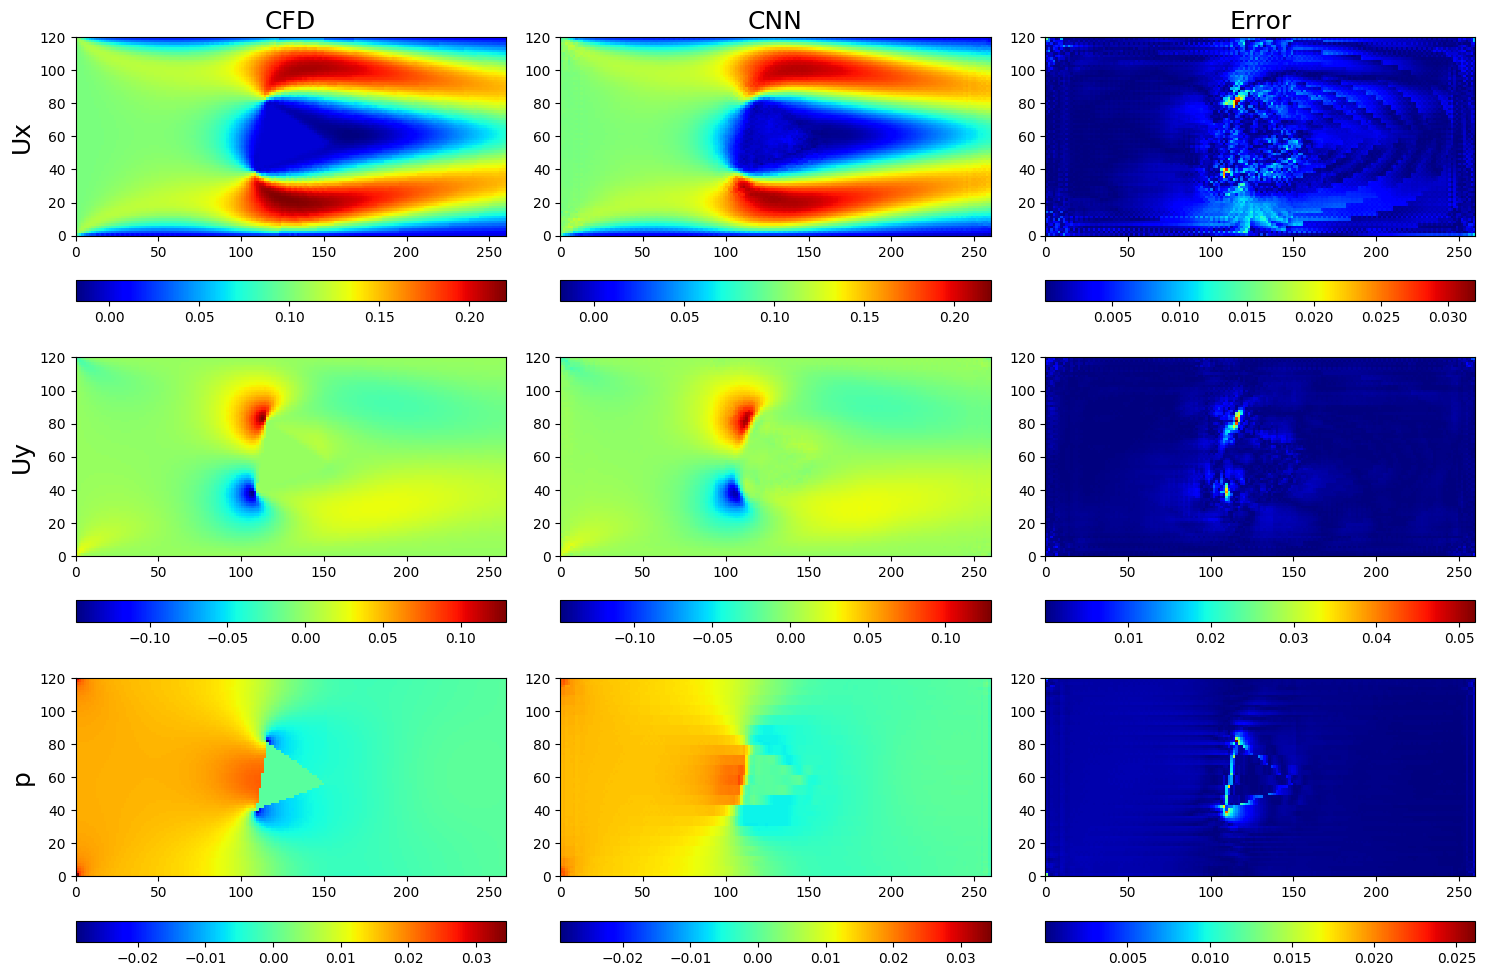

In [27]:
# 测试训练模型
out = model(test_x)
# 计算残差
error = paddle.abs(out.cpu() - test_y.cpu())
# 作出CFD和CNN的计算结果对比图以及对应的残差图(s可修改)
s = 0
visualize(test_y.detach().numpy(), out.detach().numpy(), error.detach().numpy(), s)




## 3.4 代码结构与参数说明

### 3.4.1 代码结构

```python
DeepCFD_with_PaddlePaddle
├─ config
│    └─ config.ini
├─ data
│    └─ README.md
├─ model
│    └─ UNetEx.py
├─ result
│    ├─ DeepCFD_965.pdparams
│    ├─ results.json
│    └─ train_log.txt
└─ utils
       ├─ functions.py
       └─ train_functions.py        
├─ README.md
├─ README_cn.md
├─ eval.py
├─ train.py
├─ predict.ipynb
├─ requirements.txt
```

### 3.4.2 参数说明

可以在/DeepCFD_with_PaddlePaddle/config/config.ini中设置训练的参数，包括以下内容：

| 参数             | 推荐值               | 额外说明                                      |
| ---------------- | -------------------- | --------------------------------------------- |
| batch_size       | 64                   |                                               |
| train_test_ratio | 0.7                  | 训练集占数据集的比例，0.7即训练集70%测试集30% |
| learning_rate    | 0.001                |                                               |
| weight_decay     | 0.005                | AdamW专用，若修改优化算法需要修改train.py     |
| epochs           | 1000                 |                                               |
| kernel_size      | 5                    | 卷积核大小                                    |
| filters          | 8, 16, 32, 32        | 卷积层channel数目                             |
| batch_norm       | 0                    | 批量正则化，0为False，1为True                 |
| weight_norm      | 0                    | 权重正则化，0为False，1为True                 |
| data_path        | ./data               | 数据集路径，视具体情况设置                    |
| save_path        | ./result             | 模型和训练记录的保存路径，视具体情况设置      |
| model_name       | DeepCFD_965.pdparams | 具体加载的模型名称，后缀不能省略              |


## 3.5 预测结果

下图展示了原文的预测结果，文中评价模型的优劣共包含四个指标：Total MSE、Ux MSE、Uy MSE、p MSE（MSE的意思是均方根误差）。

![metrics.png](https://github.com/zbyandmoon/Picture/blob/main/picture_DeepCFD/metrics.png?raw=true)

下图展示了某种形状障碍物的CFD（注：simpleFOAM是OpenFOAM求解器的一种）和DeepCFD流场计算结果对比。

![pytorch_contour.png](https://github.com/zbyandmoon/Picture/blob/main/picture_DeepCFD/pytorch_contour.png?raw=true)
# 4. 模型原理

下面两张图分别为该方法的计算示意图和网络结构图。文中使用的DeepCFD网络基本结构为有3个输入和3个输出的U-net型网络。该模型输入为计算域中障碍物的符号距离函数（Signed distance function, SDF）、计算域边界的SDF和流动区域的标签；输出为流体的x方向速度、y方向速度以及流体压强。该模型的基本原理就是利用编码器部分的卷积层将3个输入下采样，变为中间量，然后使用相同结构的解码器中的反卷积层将中间量上采样为3个流体物理量输出。

![compute_process.png](https://github.com/zbyandmoon/Picture/blob/main/picture_DeepCFD/compute_process.png?raw=true)

![DeepCFD_Net.png](https://github.com/zbyandmoon/Picture/blob/main/picture_DeepCFD/DeepCFD_Net.png?raw=true)


# 5. 注意事项
## 5.1 模型验收标准

复现的验收标准如下：

![standard.png](https://github.com/zbyandmoon/Picture/blob/main/picture_DeepCFD/standard.png?raw=true)

## 5.2 指标实现情况

复现的实现指标如下：

```python
Total MSE = 1.8955801725387573
Ux MSE = 0.6953578591346741
Uy MSE = 0.21001338958740234
p MSE = 0.9902092218399048
```

其中，Total MSE、Ux MSE和Uy MSE在验收标准范围内，p MSE略小于验收标准的最小值。

## 5.3 复现地址

论文复现地址：

AI Studio: https://aistudio.baidu.com/aistudio/projectdetail/4400677?contributionType=1

github: https://github.com/zbyandmoon/DeepCFD_with_PaddlePaddle/tree/main/paddle